<a href="https://colab.research.google.com/github/Sachithananthan-1/Stock-Market-Prediction-using-Tensorflow/blob/main/Stock_Market_Prediction_using_Tensorflow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2023-10-01'
stock = 'GOOG'

data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2950,2023-09-25,130.770004,132.220001,130.029999,132.169998,132.169998,14650000
2951,2023-09-26,130.914001,131.404999,128.190002,129.449997,129.449997,20378800
2952,2023-09-27,129.440002,131.720001,129.380005,131.460007,131.460007,18764200
2953,2023-09-28,130.690002,134.179993,130.690002,133.130005,133.130005,18201400


In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [5]:
data.shape

(2955, 7)

In [6]:
#Moving Average of 100 days

mavg = data.Close.rolling(100).mean()

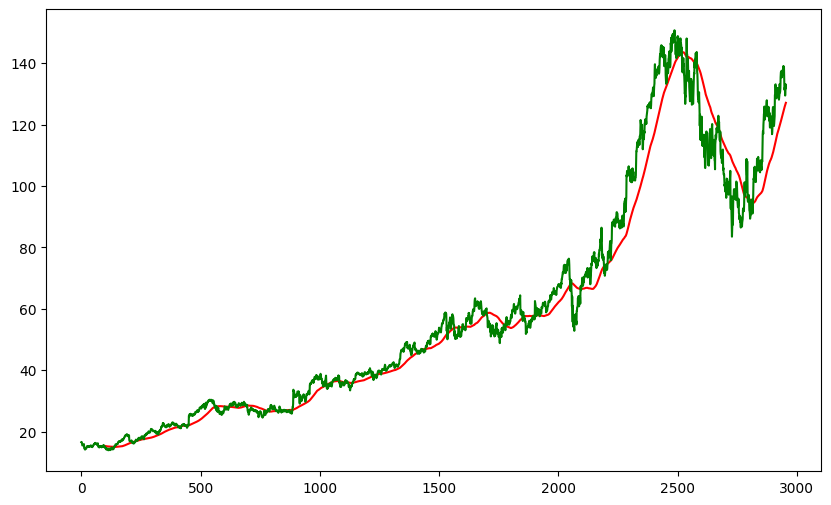

In [7]:
plt.figure(figsize=(10,6))
plt.plot(mavg, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
data.dropna(inplace=True)

In [9]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

data_train.shape[0]

2364

In [10]:
data_test.shape[0]

591

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [12]:
data_train_scale = scaler.fit_transform(data_train)

In [13]:
x = []
y = []

for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [14]:
x,y = np.array(x),np.array(y)

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [15]:
model = Sequential()

model.add(LSTM(units = 50,activation = 'relu',return_sequences=True,input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation = 'relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation = 'relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [16]:
model.compile(optimizer='adam',loss = 'mean_squared_error')


In [19]:
model.fit(x,y,epochs = 50, batch_size = 32,verbose =1)

Epoch 1/50
71/71 [==============================] - 20s 278ms/step - loss: 0.0017
Epoch 2/50
71/71 [==============================] - 21s 300ms/step - loss: 0.0017
Epoch 3/50
71/71 [==============================] - 19s 274ms/step - loss: 0.0016
Epoch 4/50
71/71 [==============================] - 21s 295ms/step - loss: 0.0016
Epoch 5/50
71/71 [==============================] - 20s 278ms/step - loss: 0.0016
Epoch 6/50
71/71 [==============================] - 19s 268ms/step - loss: 0.0015
Epoch 7/50
71/71 [==============================] - 20s 273ms/step - loss: 0.0016
Epoch 8/50
71/71 [==============================] - 19s 271ms/step - loss: 0.0014
Epoch 9/50
71/71 [==============================] - 19s 270ms/step - loss: 0.0015
Epoch 10/50
71/71 [==============================] - 19s 271ms/step - loss: 0.0014
Epoch 11/50
71/71 [==============================] - 19s 270ms/step - loss: 0.0015
Epoch 12/50
71/71 [==============================] - 19s 275ms/step - loss: 0.0015
Epoch 13/50
7

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [20]:
past_100days = data_train.tail(100)
data_test = pd.concat([past_100days,data_test],ignore_index=True)
data_test_scale = scaler.fit_transform(data_test)

In [21]:
x = []
y = []

for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])

x,y = np.array(x), np.array(y)

In [22]:
y_predict = model.predict(x)

19/19 [==============================] - 2s 80ms/step


In [23]:
scale = 1/scaler.scale_
y_predict = y_predict*scale
y = y*scale

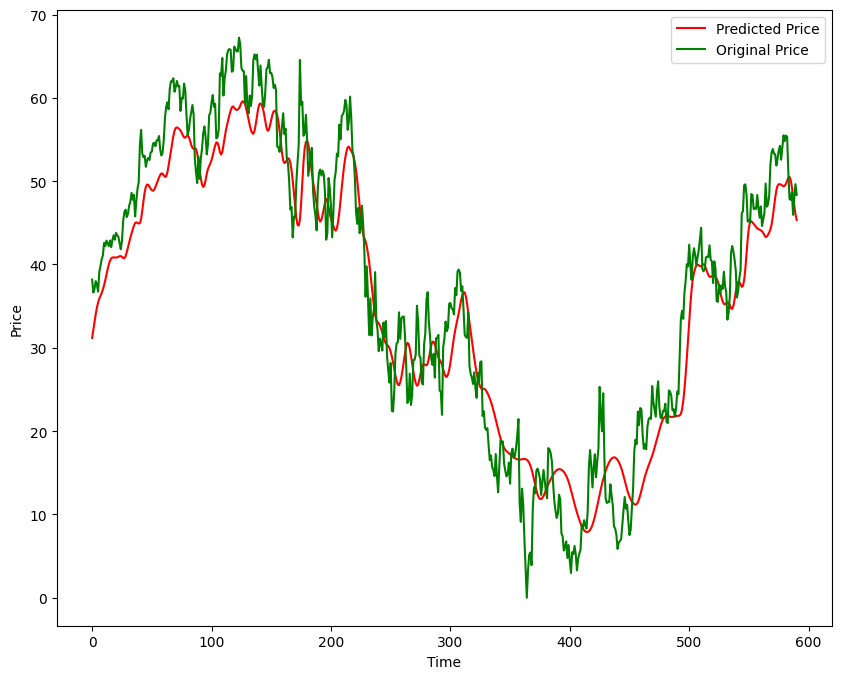

In [24]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label = 'Predicted Price')
plt.plot(y,'g',label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [25]:
model.save('Stock_Market_Prediction using Tensorflow_Keras.keras')

In [26]:
import keras
print(keras.__version__)


2.14.0
